In [1]:
import os
from os.path import join
import sys
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from notebook_utils import get_field_free_data, plot_field_free_data, plot_selection_quality

In [5]:
w2s, wcs, Cs, losses = get_field_free_data('./runs')
w1s = np.zeros(len(w2s)) + 6.0
t = pd.DataFrame(data={'w_1 [GHz]': w1s, 'w_2 [GHz]': w2s, 'w_c [GHz]': wcs, 
                 'concurrence': Cs, 'pop loss': losses},
                 columns=['w_1 [GHz]', 'w_2 [GHz]', 'w_c [GHz]', 'concurrence', 'pop loss'])
print t.sort(['w_2 [GHz]', 'w_c [GHz]']).to_string(index=False)

 w_1 [GHz]  w_2 [GHz]  w_c [GHz]  concurrence  pop loss
         6       6.10        5.0     0.253890  0.015124
         6       6.10        5.8     0.065985  0.018541
         6       6.10        6.1     0.793596  0.027772
         6       6.10        6.3     0.098297  0.017763
         6       6.10        6.6     0.339398  0.015604
         6       6.10        7.1     0.142707  0.015110
         6       6.10        7.6     0.074002  0.015003
         6       6.10        8.1     0.044813  0.014964
         6       6.10        8.6     0.029948  0.014945
         6       6.10        9.1     0.021398  0.014935
         6       6.10       10.1     0.012467  0.014924
         6       6.10       11.1     0.008147  0.014919
         6       6.20        5.0     0.351765  0.015113
         6       6.20        5.8     0.828764  0.018307
         6       6.20        6.1     0.000002  0.028297
         6       6.20        6.3     0.294241  0.020069
         6       6.20        6.6     0.602638  0

/home/users/0001/uk006169/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


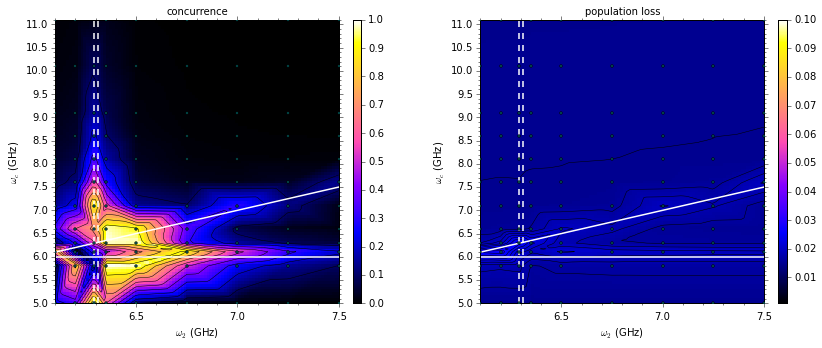

In [6]:
plot_field_free_data('./runs')

In [7]:
from select_for_stage2 import all_select_runs
from notebook_utils import get_stage2_selection_table, plot_selection_data

In [8]:
select_data = all_select_runs()

Incomplete data to select for stage 2 runs/w2_7250MHz_wc_7100MHz/stage1
    SQ_1freq_center: OK
    PE_2freq_resonant: MISSING
    SQ_2freq_random: MISSING
    SQ_1freq_random: OK
    SQ_5freq_random: MISSING
    SQ_2freq_resonant: MISSING
    PE_5freq_random: MISSING
    PE_2freq_random: MISSING
    PE_1freq_random: OK
    PE_1freq_center: OK


In [9]:
t_PE = get_stage2_selection_table(select_data, target='PE')
t_SQ = get_stage2_selection_table(select_data, target='SQ')

In [10]:
def write_table(t, outfile):
    pd.set_option('display.max_colwidth', 1000)
    formatters={'pulse details':'{{:<{}s}}'.format(t['pulse details'].str.len().max()).format,
                'category':'{{:<{}s}}'.format(t['category'].str.len().max()).format}
    with open(outfile, "w") as out_fh:
        t.sort(['w_2 [GHz]', 'w_c [GHz]', 'category']).to_string(
        buf=out_fh, index=False, formatters=formatters, justify='left')

In [11]:
write_table(t_PE, 'select_PE_table.dat')
write_table(t_SQ, 'select_SQ_table.dat')

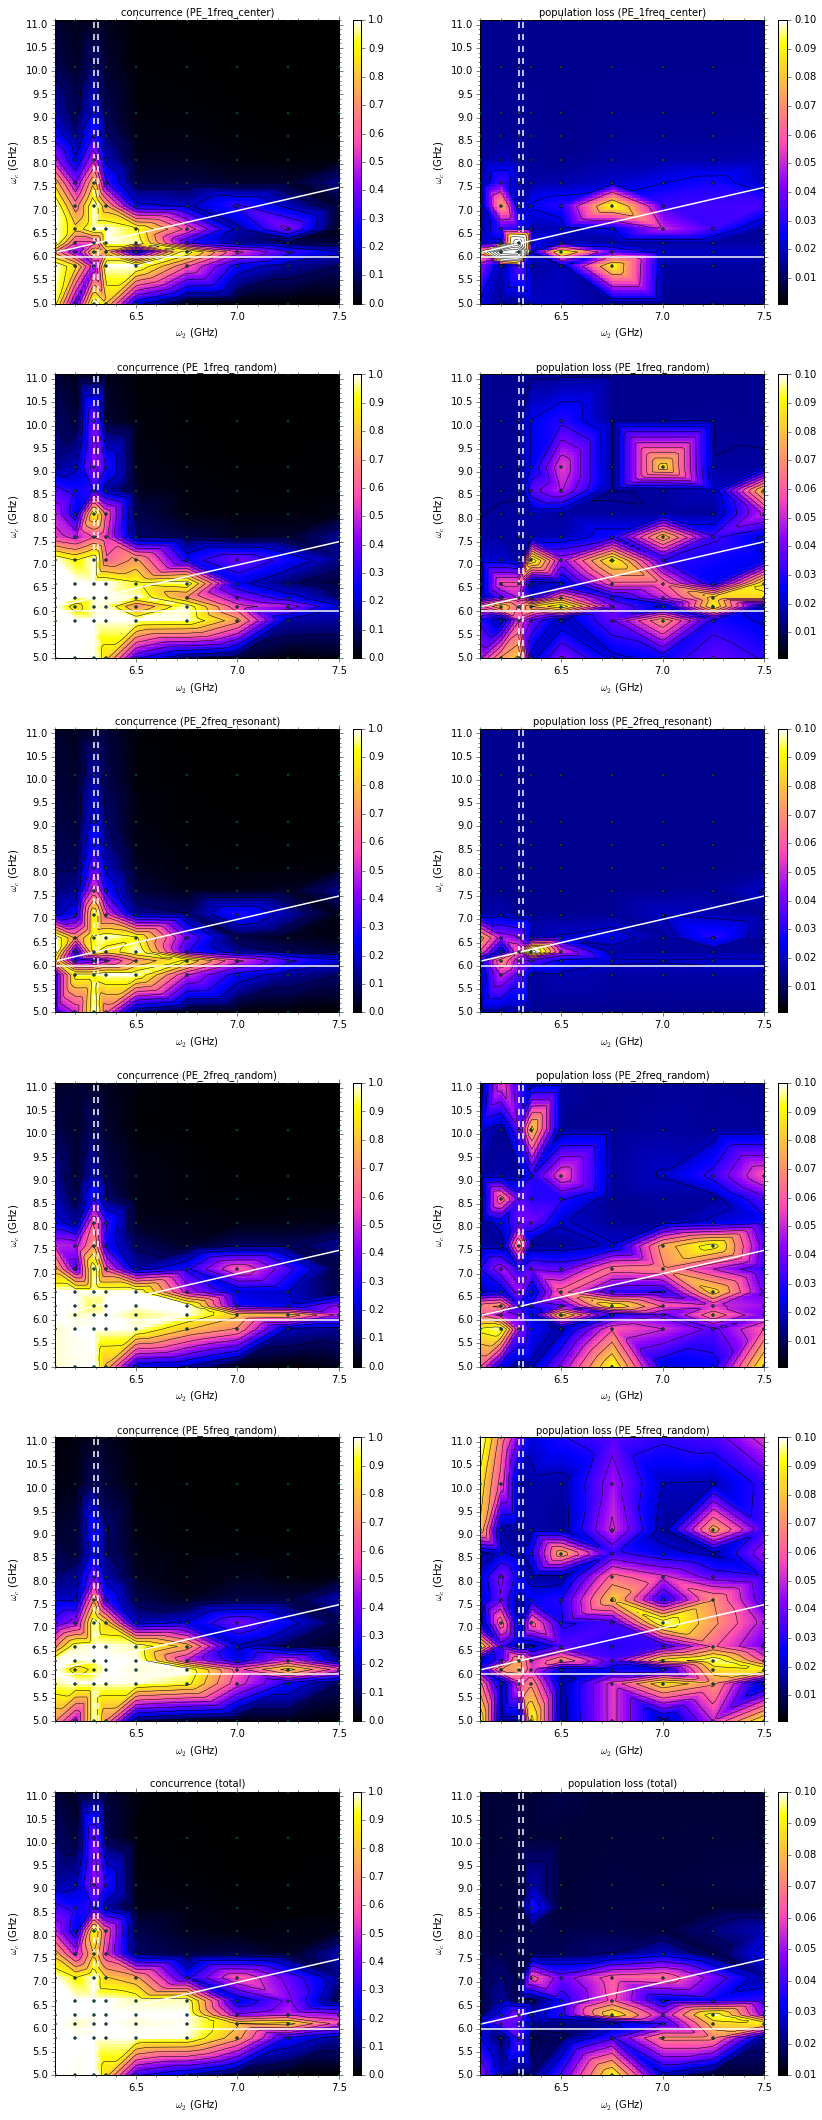

In [12]:
plot_selection_data(select_data, 'PE')

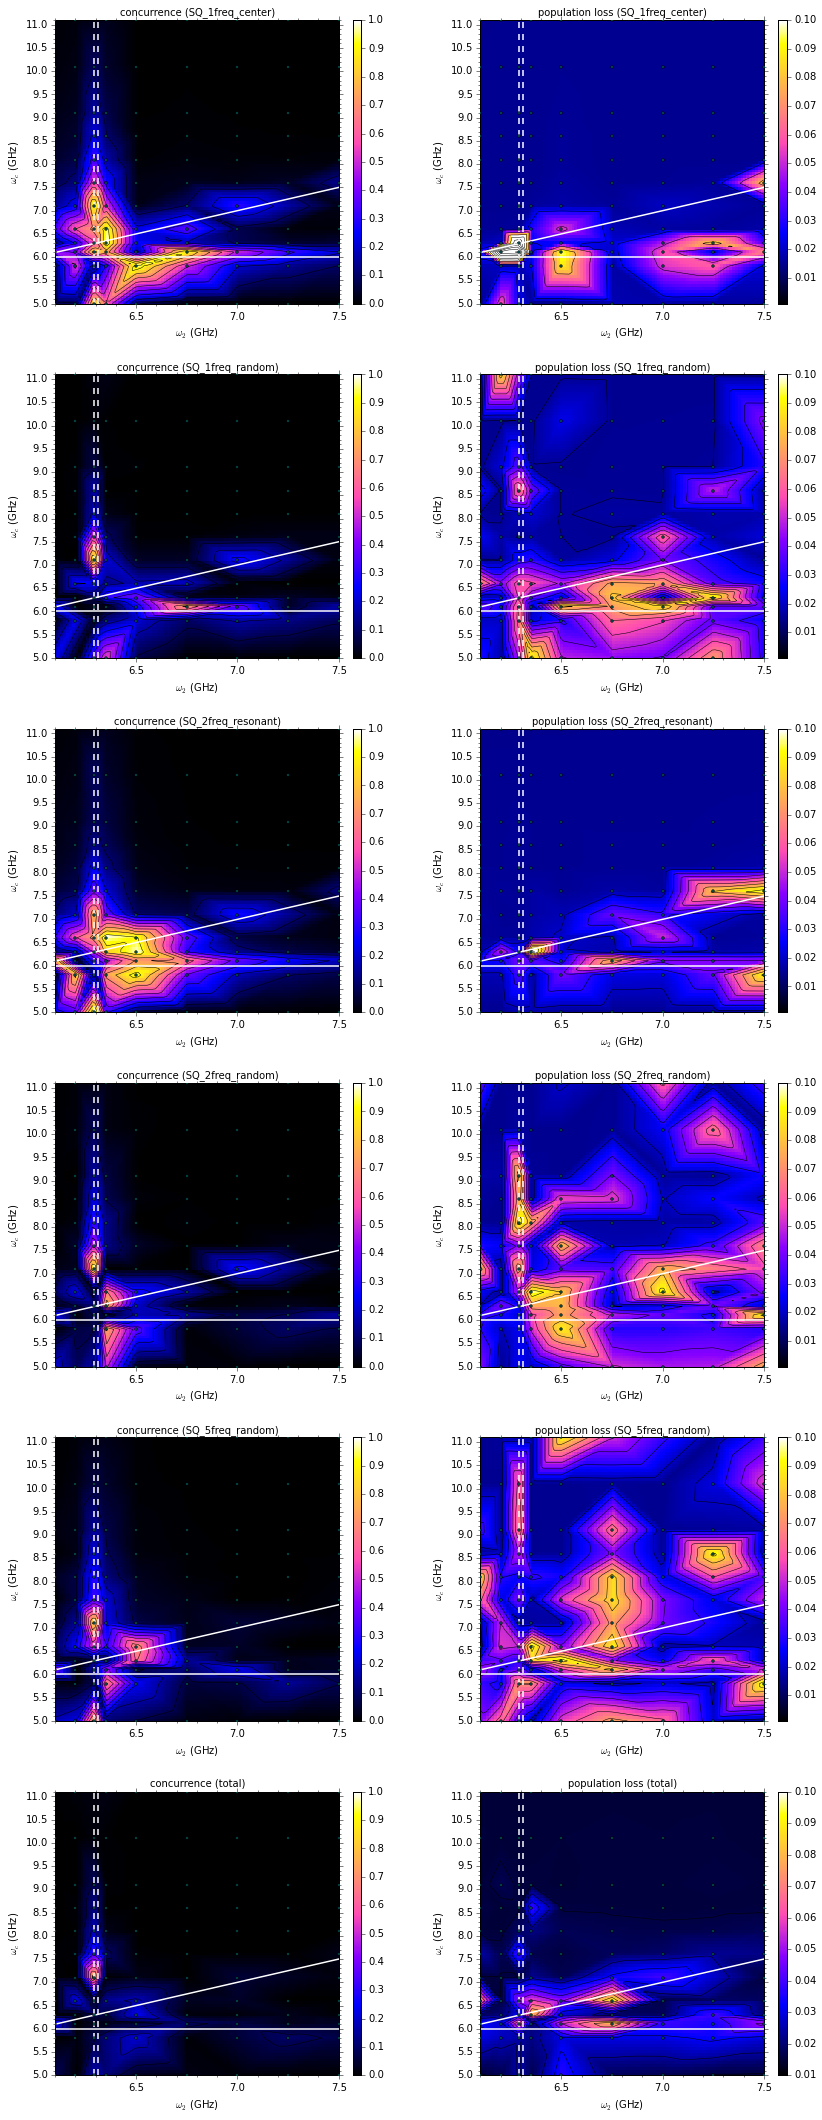

In [13]:
plot_selection_data(select_data, 'SQ')

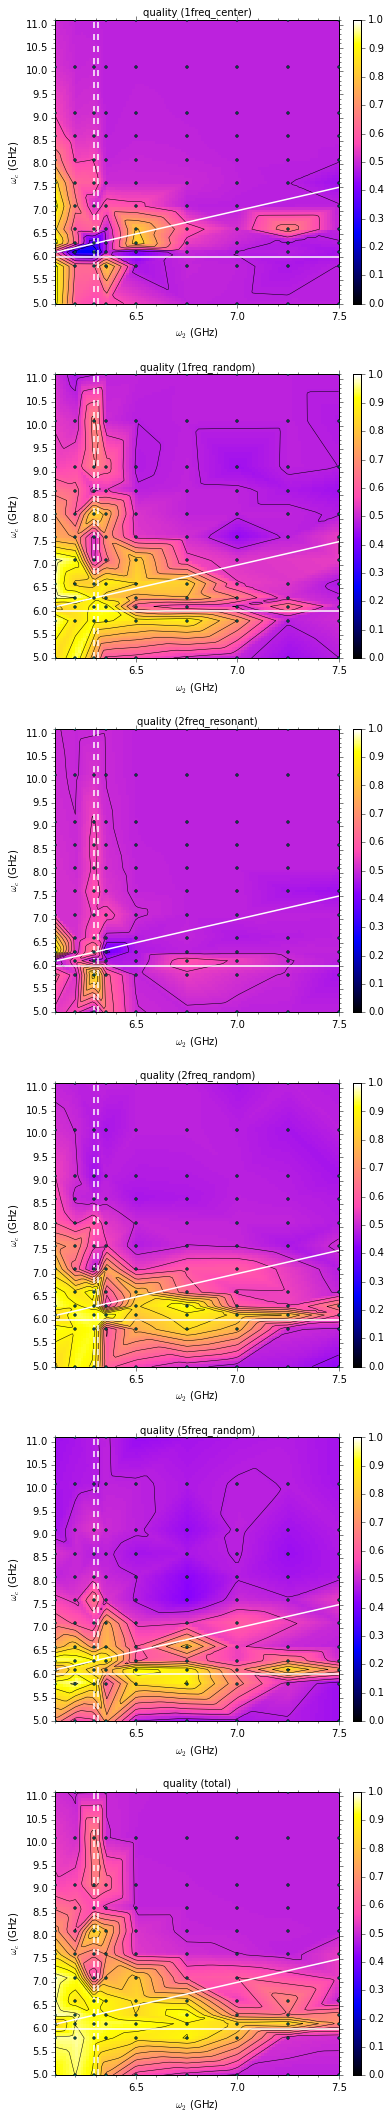

In [14]:
plot_selection_quality(select_data)